In [21]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from osgeo import gdal
import earthpy as et

In [2]:
file_path = os.path.join(et.io.HOME, 
                         'desktop', 
                         'earth-analytics', 
                         'python', 
                         'final-project')

files_to_mosaic = glob.glob(os.path.join(str(file_path), "*.tif"))
files_to_mosaic



['/Users/merielle/desktop/earth-analytics/python/final-project/f180831t01p00r09_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif',
 '/Users/merielle/desktop/earth-analytics/python/final-project/f180612t01p00r09_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif',
 '/Users/merielle/desktop/earth-analytics/python/final-project/f180904t01p00r08_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif',
 '/Users/merielle/desktop/earth-analytics/python/final-project/f180831t01p00r10_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif',
 '/Users/merielle/desktop/earth-analytics/python/final-project/f180612t01p00r07_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif',
 '/Users/merielle/desktop/earth-analytics/python/final-project/f180831t01p00r11_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif',
 '/Users/merielle/desktop/earth-analytics/python/final-project/f180612t01p00r06_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif',
 '/Users/merielle/desktop/earth-analytics/python/final-

In [3]:
files_string = " ".join(files_to_mosaic)
print(files_string)

/Users/merielle/desktop/earth-analytics/python/final-project/f180831t01p00r09_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif /Users/merielle/desktop/earth-analytics/python/final-project/f180612t01p00r09_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif /Users/merielle/desktop/earth-analytics/python/final-project/f180904t01p00r08_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif /Users/merielle/desktop/earth-analytics/python/final-project/f180831t01p00r10_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif /Users/merielle/desktop/earth-analytics/python/final-project/f180612t01p00r07_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif /Users/merielle/desktop/earth-analytics/python/final-project/f180831t01p00r11_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif /Users/merielle/desktop/earth-analytics/python/final-project/f180612t01p00r06_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif /Users/merielle/desktop/earth-analytics/python/final-project/f180831t01p00r08_rfl_v

In [4]:
mosaic_file_path = os.path.join(et.io.HOME, 
                                'desktop', 
                                'earth-analytics', 
                                'python', 
                                'final-project')


command = "gdal_merge.py -o /Users/merielle/desktop/earth-analytics/python/final-project/carbon-mosaic.tif -of gtiff " + files_string
print(os.popen(command).read())

0...10...20...30...40...50...60...70...80...90...100 - done.



In [5]:
print(os.popen('ls /Users/merielle/desktop/earth-analytics/python/final-project/').read())



aviris.ipynb
carbon-mosaic.tif
f180612t01p00r06_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180612t01p00r07_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180612t01p00r08_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180612t01p00r09_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180831t01p00r08_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180831t01p00r09_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180831t01p00r10_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180831t01p00r11_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180904t01p00r07_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
f180904t01p00r08_rfl_v1k2_img_PLSR_500_raw_coef_Nitrogen_400_2400.tif
mtbs.ipynb



In [6]:
def raster2array(geotif_file):
    metadata = {}
    dataset = gdal.Open(geotif_file)
    metadata['array_rows'] = dataset.RasterYSize
    metadata['array_cols'] = dataset.RasterXSize
    metadata['bands'] = dataset.RasterCount
    metadata['driver'] = dataset.GetDriver().LongName
    metadata['projection'] = dataset.GetProjection()
    metadata['geotransform'] = dataset.GetGeoTransform()

    mapinfo = dataset.GetGeoTransform()
    metadata['pixelWidth'] = mapinfo[1]
    metadata['pixelHeight'] = mapinfo[5]

    xMin = mapinfo[0]
    xMax = mapinfo[0] + dataset.RasterXSize/mapinfo[1]
    yMin = mapinfo[3] + dataset.RasterYSize/mapinfo[5]
    yMax = mapinfo[3]

    metadata['extent'] = (xMin,xMax,yMin,yMax)

    raster = dataset.GetRasterBand(1)
    array_shape = raster.ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(float).shape
    metadata['noDataValue'] = raster.GetNoDataValue()
    metadata['scaleFactor'] = raster.GetScale()

    array = np.zeros((array_shape[0],array_shape[1],dataset.RasterCount),'uint8') #pre-allocate stackedArray matrix

    if metadata['bands'] == 1:
        raster = dataset.GetRasterBand(1)
        metadata['noDataValue'] = raster.GetNoDataValue()
        metadata['scaleFactor'] = raster.GetScale()

        array = dataset.GetRasterBand(1).ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(float)
        array[np.where(array==metadata['noDataValue'])]=np.nan
        array = array/metadata['scaleFactor']

    elif metadata['bands'] > 1:    
        for i in range(1, dataset.RasterCount+1):
            band = dataset.GetRasterBand(i).ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(float)
            band[np.where(band==metadata['noDataValue'])]=np.nan
            #band = band/metadata['scaleFactor']
            array[...,i-1] = band

    return array, metadata

In [33]:
# call function

carbon_array, carbon_metadata = raster2array('/Users/merielle/desktop/earth-analytics/python/final-project/nitrogen-mosaic.tif')

In [34]:
carbon_array_one_layer = carbon_array[:,:,0]

In [35]:
#print metadata in alphabetical order
for item in sorted(carbon_metadata):
    print(item + ':', carbon_metadata[item])
    

array_cols: 7421
array_rows: 44948
bands: 2
driver: GeoTIFF
extent: (615740.53, 616260.0867927332, 4780084.014308076, 4783230.9)
geotransform: (615740.53, 14.283327835945807, 0.0, 4783230.9, 0.0, -14.283327835945807)
noDataValue: None
pixelHeight: -14.283327835945807
pixelWidth: 14.283327835945807
projection: PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]
scaleFactor: None


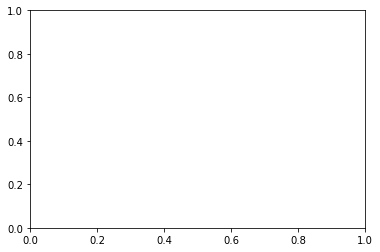

In [36]:
def plot_array(array,spatial_extent,colorlimit,ax=plt.gca(),title='',cmap_title='',colormap=''):
    plot = plt.imshow(array,extent=spatial_extent,clim=colorlimit); 
    cbar = plt.colorbar(plot,aspect=40); plt.set_cmap(colormap); 
    cbar.set_label(cmap_title,rotation=90,labelpad=20);
    plt.title(title); ax = plt.gca(); 
    ax.ticklabel_format(useOffset=False, style='plain'); 
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90); 

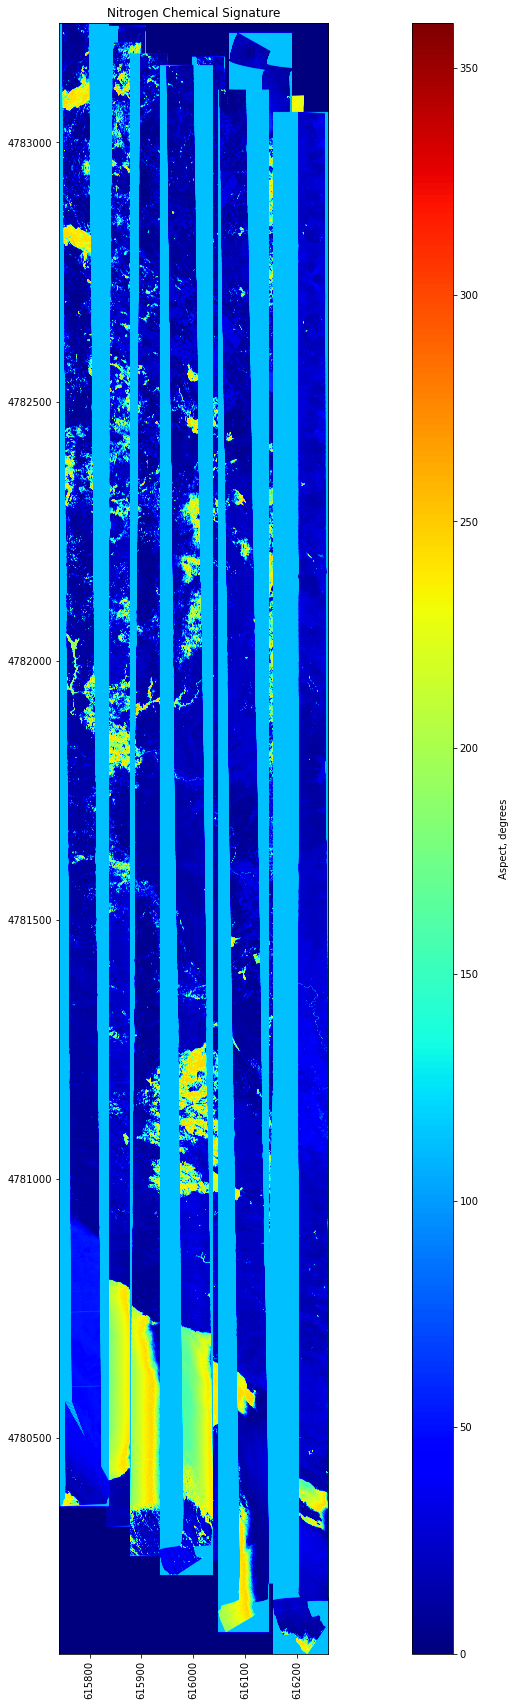

In [37]:
fig, ax = plt.subplots(figsize=(30,30))

plot_array(carbon_array_one_layer,
           aviris_metadata['extent'],
           (0,360),
           title='Nitrogen Chemical Signature',
           cmap_title='Aspect, degrees',
           colormap='jet')

In [22]:
# K means clustering

In [31]:
kmeans = KMeans(
    init="random", 
    n_clusters=3, 
    n_init=10, 
    max_iter=300, 
    random_state=42)

In [38]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(carbon_array_one_layer)

In [39]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [47]:
# The lowest SSE value
print("lowest SSE value: ", kmeans.inertia_, '\n')


# Final locations of the centroid
print("final locations of the centroid: \n", kmeans.cluster_centers_ , '\n')

# The number of iterations required to converge
print('number of iterations required to converge', kmeans.n_iter_)

lowest SSE value:  252112548.26586485 

final locations of the centroid: 
 [[-2.07349972 -2.07352387 -2.07256193 ... -1.15482435 -1.15270957
  -1.14892706]
 [ 0.23688915  0.23686711  0.23864076 ...  0.24102148  0.24076566
   0.240306  ]
 [ 0.31509702  0.31510465  0.31465828 ...  0.15810574  0.15778664
   0.15721622]] 

number of iterations required to converge 14


In [48]:
kmeans.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [55]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }


In [57]:

# A list holds the SSE values for each k
#sse = []
#for k in range(1, 11):
#    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#    kmeans.fit(scaled_features)
#    sse.append(kmeans.inertia_)

In [ ]:
#plt.style.use("fivethirtyeight")
#plt.plot(range(1, 11), sse)
#plt.xticks(range(1, 11))
#plt.xlabel("Number of Clusters")
#plt.ylabel("SSE")
#plt.show()

In [58]:
kl = KneeLocator(
   range(1, 11), sse, curve="convex", direction="decreasing"
   )

kl.elbow

5

In [59]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

KeyboardInterrupt: 

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()